1. Filtrar para quedarse sólo con

- 50 películas (aquellas con mayor número de evaluaciones)

- 100 usuarios (aquellos con mayor número de evaluaciones)

2. Generar los mapas de visualización de las 50 películas: PCA, MDS

3. Generar el dendrograma para visualizar la similitud entre las 50 películas. Se debe mostrar el nombre de cada película.

4. Recomendación

- Mostrar el listado de las 50 películas incluyendo id y nombre

- El usuario debe escribir el id de 5 películas de su agrado

- El sistema debe recomendar 5 películas de acuerdo a las proporcionadas en el paso anterior

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
from collections import Counter
import scipy.cluster.hierarchy as sch

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
import easygui as eg

In [62]:


client = pd.read_csv('Clientes_descripcion.txt',delimiter='|',header=None)
movies = pd.read_csv('Peliculas_descripcion.txt', delimiter='|', header=None)
rating = pd.read_csv('Peliculas_Clientes.txt', delim_whitespace=True, header=None)

client = client.drop(client.iloc[:,4:5],axis=1)

movies = movies.drop(movies.iloc[:,3:5], axis=1)
movies = movies.drop(movies.iloc[:,3:], axis=1)

rating = rating.drop(rating.iloc[:,3:4], axis=1)

client_columns = ['id','age','sex','profession']
client.columns = client_columns

movies_columns = ['id','name','release_date']
movies.columns = movies_columns

rating_columns = ['id_client','id_movies','rating']
rating.columns = rating_columns

client

,id,age,sex,profession
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other
...,...,...,...,...
938,939,26,F,student
939,940,32,M,administrator
940,941,20,M,student
941,942,48,F,librarian


In [63]:
movies

,id,name,release_date
0,1,Toy Story (1995),01-Jan-1995
1,2,GoldenEye (1995),01-Jan-1995
2,3,Four Rooms (1995),01-Jan-1995
3,4,Get Shorty (1995),01-Jan-1995
4,5,Copycat (1995),01-Jan-1995
...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998
1678,1679,B. Monkey (1998),06-Feb-1998
1679,1680,Sliding Doors (1998),01-Jan-1998
1680,1681,You So Crazy (1994),01-Jan-1994


In [64]:
rating

,id_client,id_movies,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


1. Filtrar para quedarse sólo con

- 50 películas (aquellas con mayor número de evaluaciones)

- 100 usuarios (aquellos con mayor número de evaluaciones)

In [65]:
clients_counter = Counter(rating.id_client.values)
clients_counter = sorted(clients_counter.items(), key=lambda x:x[1])

while len(clients_counter)>100:
    clients_counter.pop(0)

clients_counter = dict(clients_counter)
clients_counter

{244: 238,
 798: 239,
 886: 240,
 932: 241,
 506: 242,
 314: 245,
 666: 245,
 894: 245,
 788: 249,
 184: 251,
 504: 251,
 339: 254,
 280: 258,
 881: 259,
 533: 260,
 313: 262,
 437: 263,
 472: 263,
 833: 267,
 883: 268,
 716: 269,
 870: 269,
 389: 271,
 1: 272,
 178: 273,
 805: 273,
 374: 274,
 532: 274,
 301: 275,
 18: 277,
 457: 277,
 95: 278,
 271: 278,
 497: 279,
 299: 280,
 385: 281,
 328: 283,
 653: 283,
 327: 284,
 286: 288,
 85: 288,
 747: 293,
 311: 294,
 864: 294,
 291: 296,
 648: 297,
 90: 300,
 387: 304,
 194: 305,
 749: 305,
 524: 306,
 151: 307,
 363: 311,
 650: 311,
 145: 316,
 916: 317,
 642: 318,
 399: 319,
 727: 322,
 269: 323,
 889: 326,
 474: 327,
 268: 328,
 804: 332,
 334: 333,
 551: 334,
 406: 342,
 130: 353,
 561: 357,
 758: 357,
 796: 358,
 592: 360,
 896: 362,
 417: 365,
 880: 368,
 378: 375,
 435: 379,
 59: 382,
 201: 386,
 222: 387,
 92: 388,
 293: 388,
 308: 397,
 682: 399,
 94: 400,
 7: 403,
 846: 405,
 429: 414,
 279: 434,
 181: 435,
 393: 448,
 234: 480,

In [66]:
movies_counter = Counter(rating.id_movies.values)
movies_counter = sorted(movies_counter.items(), key=lambda x:x[1])

while len(movies_counter)>50:
    movies_counter.pop(0)

movies_counter = dict(movies_counter)
movies_counter

{28: 276,
 234: 280,
 202: 280,
 64: 283,
 176: 284,
 216: 290,
 183: 291,
 118: 293,
 15: 293,
 25: 293,
 328: 295,
 96: 295,
 302: 297,
 22: 297,
 318: 298,
 276: 298,
 9: 299,
 423: 300,
 195: 301,
 257: 303,
 269: 315,
 748: 316,
 168: 316,
 69: 321,
 173: 324,
 151: 326,
 210: 331,
 79: 336,
 405: 344,
 204: 350,
 313: 350,
 222: 365,
 172: 367,
 117: 378,
 237: 384,
 98: 390,
 7: 392,
 56: 394,
 127: 413,
 174: 420,
 121: 429,
 300: 431,
 1: 452,
 288: 478,
 286: 481,
 294: 485,
 181: 507,
 100: 508,
 258: 509,
 50: 583}

In [67]:
unused_clients = list(np.setdiff1d(client.id.values, list(clients_counter.keys()))-1)

client.drop(index=unused_clients, inplace=True) #tome efecto en el objeto original

client

,id,age,sex,profession
0,1,24,M,technician
6,7,57,M,administrator
12,13,47,M,educator
17,18,35,F,other
58,59,49,M,educator
...,...,...,...,...
888,889,24,M,technician
893,894,47,M,educator
895,896,28,M,writer
915,916,27,M,engineer


In [68]:
unused_movies = list(np.setdiff1d(movies.id.values, list(movies_counter.keys()))-1)

movies.drop(index=unused_movies, inplace=True) #tome efecto en el objeto original

movies

,id,name,release_date
0,1,Toy Story (1995),01-Jan-1995
6,7,Twelve Monkeys (1995),01-Jan-1995
8,9,Dead Man Walking (1995),01-Jan-1995
14,15,Mr. Holland's Opus (1995),29-Jan-1996
21,22,Braveheart (1995),16-Feb-1996
24,25,"Birdcage, The (1996)",08-Mar-1996
27,28,Apollo 13 (1995),01-Jan-1995
49,50,Star Wars (1977),01-Jan-1977
55,56,Pulp Fiction (1994),01-Jan-1994
63,64,"Shawshank Redemption, The (1994)",01-Jan-1994


In [69]:
rating = rating[[user in client.id.values for user in rating.id_client]]
rating = rating[[movie in movies.id.values for movie in rating.id_movies]]

rating

,id_client,id_movies,rating
23,291,118,2
24,308,1,4
31,301,98,4
164,90,98,5
185,13,98,4
...,...,...,...
99934,788,328,4
99942,363,181,5
99951,130,121,5
99982,279,64,1


2. Generar los mapas de visualización de las 50 películas: PCA, MDS

In [70]:
rating_matrix = pd.DataFrame(index=movies.name.values, columns=client.id.values)

for id_client, id_movie, rating in zip(rating.id_client, rating.id_movies,rating.rating):
    rating_matrix.at[movies.at[id_movie-1,'name'],id_client] = rating

rating_matrix

,1,7,13,18,59,85,90,92,94,95,...,870,880,881,883,886,889,894,896,916,932
Toy Story (1995),5,NaN,3,5,2,NaN,NaN,4,4,5,...,5,4,4,3,4,3,4,4,4,4
Twelve Monkeys (1995),4,5,2,NaN,4,NaN,NaN,4,4,5,...,4,3,4,5,5,3,4,4,4,4
Dead Man Walking (1995),5,5,3,5,4,4,4,4,5,NaN,...,5,NaN,3,4,5,4,4,4,5,5
Mr. Holland's Opus (1995),5,NaN,NaN,4,5,NaN,NaN,3,NaN,4,...,NaN,NaN,3,NaN,3,NaN,3,3,NaN,NaN
Braveheart (1995),4,5,4,5,4,NaN,4,3,4,4,...,4,4,5,3,4,3,NaN,5,4,NaN
"Birdcage, The (1996)",4,3,1,3,4,2,5,3,3,3,...,NaN,4,3,NaN,NaN,NaN,2,3,NaN,NaN
Apollo 13 (1995),4,5,5,3,5,4,NaN,3,4,4,...,4,5,5,3,4,4,NaN,2,4,NaN
Star Wars (1977),5,5,5,4,5,5,NaN,5,5,5,...,3,5,3,4,5,4,4,5,5,NaN
Pulp Fiction (1994),4,5,5,5,5,4,5,5,5,NaN,...,5,5,1,5,4,5,NaN,NaN,5,4
"Shawshank Redemption, The (1994)",5,5,5,5,5,5,4,4,5,5,...,5,5,5,4,5,5,NaN,4,5,2


In [71]:
rating_matrix['avg'] = rating_matrix.mean(axis=1)

for i in range(0,50):
    rating_matrix.iloc[i] = rating_matrix.iloc[i].replace(np.nan,rating_matrix.iloc[i].mean())
#rating_matrix = rating_matrix.fillna(value=rating_matrix['avg'],axis=0)

rating_matrix.columns = rating_matrix.columns.astype(str)

rating_matrix

,1,7,13,18,59,85,90,92,94,95,...,880,881,883,886,889,894,896,916,932,avg
Toy Story (1995),5.0,3.890244,3.0,5.0,2.0,3.890244,3.890244,4.0,4.0,5.0,...,4.0,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.890244
Twelve Monkeys (1995),4.0,5.0,2.0,3.8875,4.0,3.8875,3.8875,4.0,4.0,5.0,...,3.0,4.0,5.0,5.0,3.0,4.0,4.0,4.0,4.0,3.887500
Dead Man Walking (1995),5.0,5.0,3.0,5.0,4.0,4.0,4.0,4.0,5.0,4.074627,...,4.074627,3.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,4.074627
Mr. Holland's Opus (1995),5.0,3.655172,3.655172,4.0,5.0,3.655172,3.655172,3.0,3.655172,4.0,...,3.655172,3.0,3.655172,3.0,3.655172,3.0,3.0,3.655172,3.655172,3.655172
Braveheart (1995),4.0,5.0,4.0,5.0,4.0,4.072289,4.0,3.0,4.0,4.0,...,4.0,5.0,3.0,4.0,3.0,4.072289,5.0,4.0,4.072289,4.072289
"Birdcage, The (1996)",4.0,3.0,1.0,3.0,4.0,2.0,5.0,3.0,3.0,3.0,...,4.0,3.0,3.242857,3.242857,3.242857,2.0,3.0,3.242857,3.242857,3.242857
Apollo 13 (1995),4.0,5.0,5.0,3.0,5.0,4.0,3.928571,3.0,4.0,4.0,...,5.0,5.0,3.0,4.0,4.0,3.928571,2.0,4.0,3.928571,3.928571
Star Wars (1977),5.0,5.0,5.0,4.0,5.0,5.0,4.404255,5.0,5.0,5.0,...,5.0,3.0,4.0,5.0,4.0,4.0,5.0,5.0,4.404255,4.404255
Pulp Fiction (1994),4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.191489,...,5.0,1.0,5.0,4.0,5.0,4.191489,4.191489,5.0,4.0,4.191489
"Shawshank Redemption, The (1994)",5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,...,5.0,5.0,4.0,5.0,5.0,4.407407,4.0,5.0,2.0,4.407407


0.04495439370314142

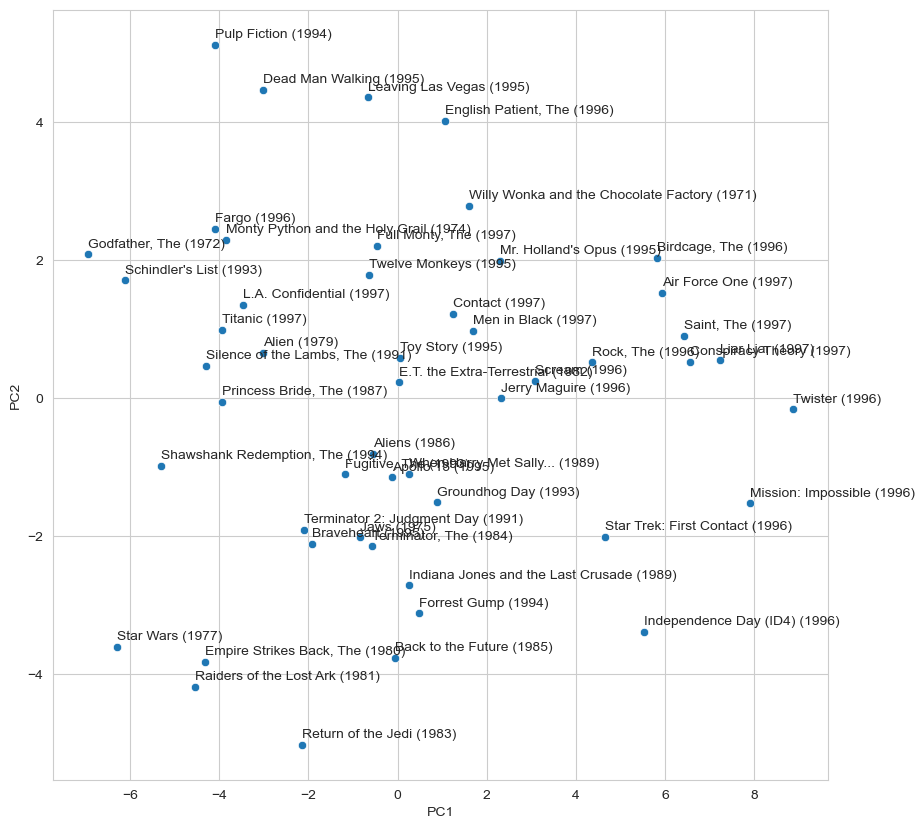

In [72]:
pca = PCA(n_components=2)

pca.fit(rating_matrix)
pca_data = pca.transform(rating_matrix)

pca_df = pd.DataFrame(pca_data,index=rating_matrix.index, columns=['PC1','PC2'])
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)

for i in range(0,50):
    plt.annotate(rating_matrix.index.values[i], (pca_df.PC1[i], pca_df.PC2[i] + 0.1))

pca_df.PC1[0]

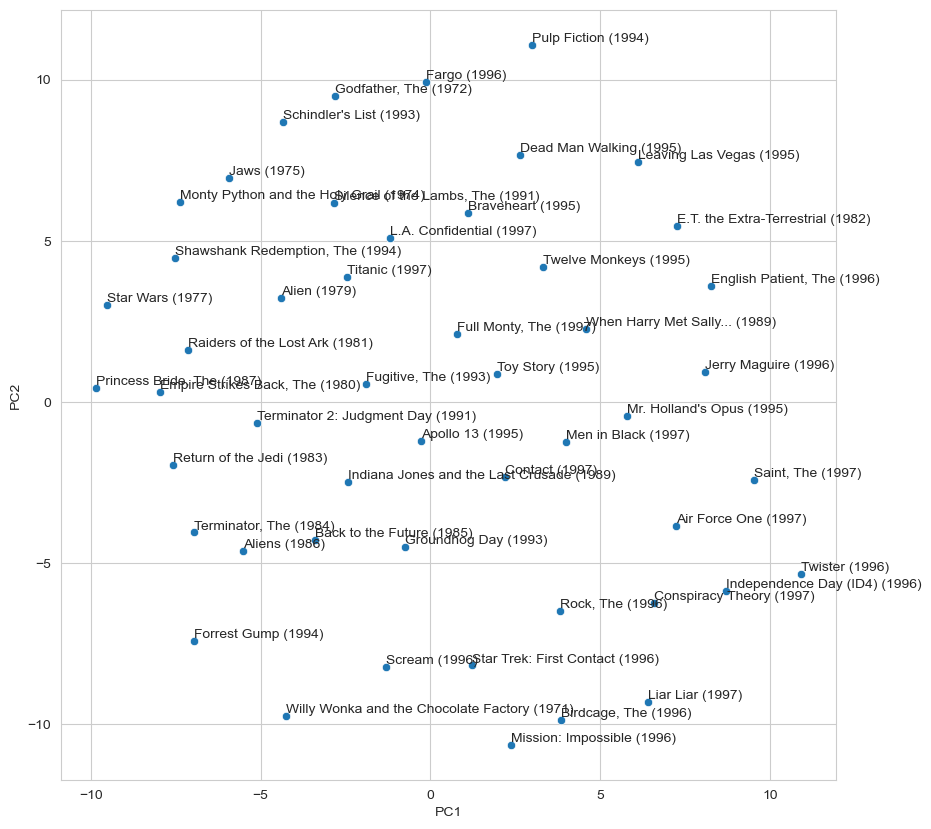

In [73]:
mds = MDS(n_components=2)

mds_data = mds.fit_transform(rating_matrix)

mds_df = pd.DataFrame(mds_data,index=rating_matrix.index, columns=['PC1','PC2'])
plt.figure(figsize=(10,10))
sns.scatterplot(x='PC1', y='PC2', data=mds_df)

for i in range(0,50):
    plt.annotate(rating_matrix.index.values[i], (mds_df.PC1[i], mds_df.PC2[i] + 0.1))

3. Generar el dendrograma para visualizar la similitud entre las 50 películas. Se debe mostrar el nombre de cada película.

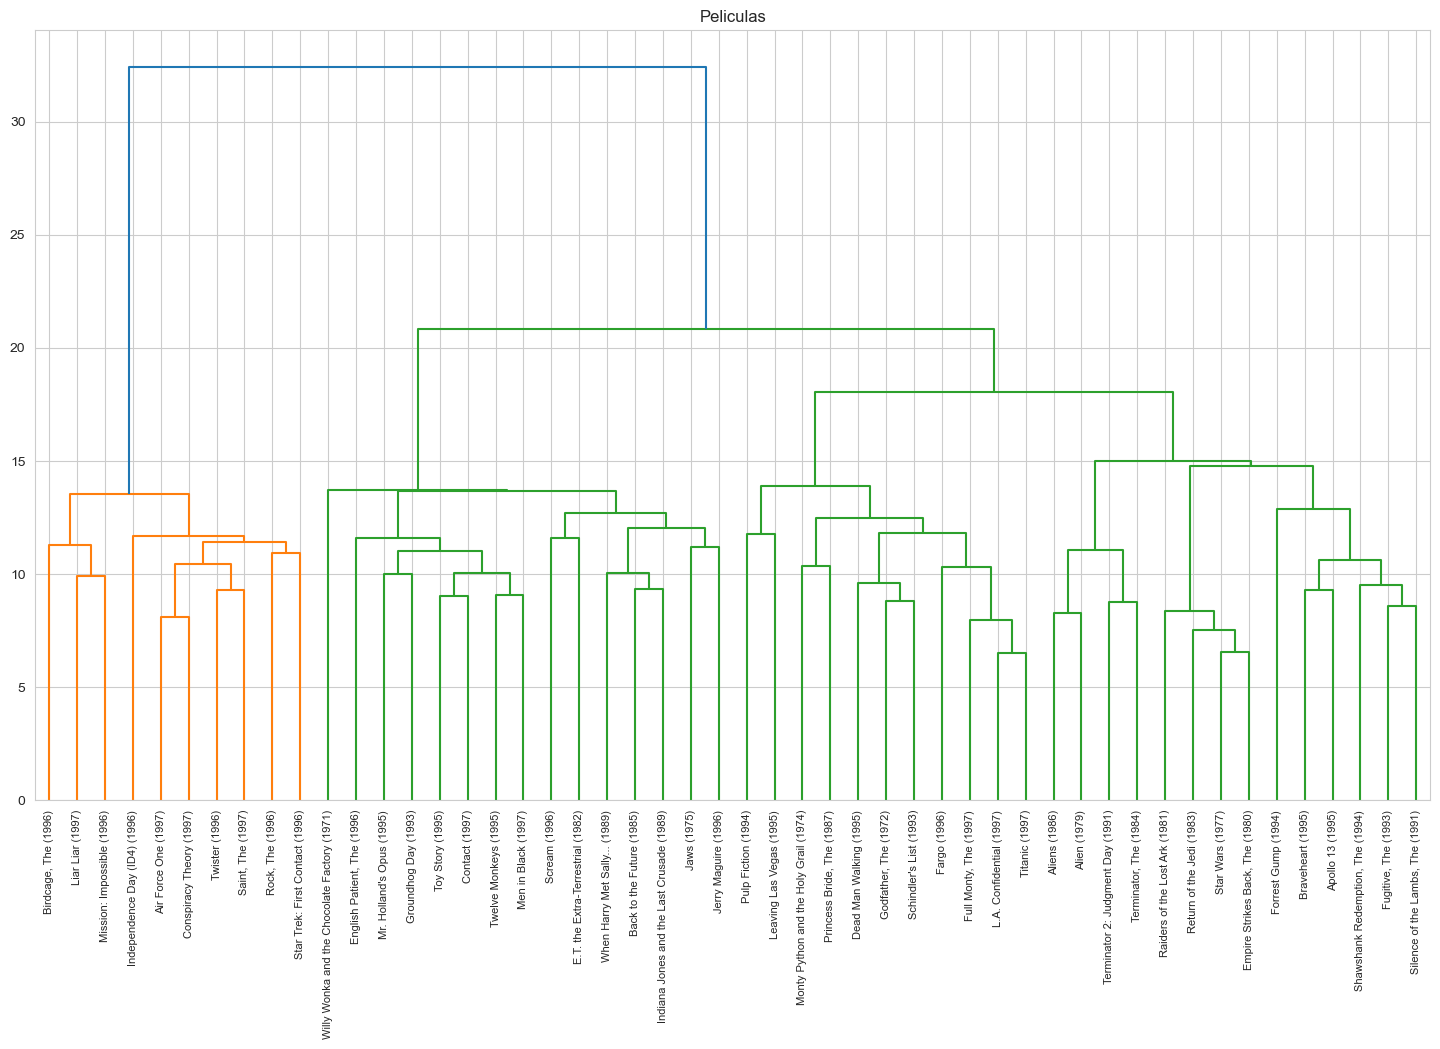

In [74]:
plt.figure(figsize=(18,10))

dendrogram = sch.dendrogram(sch.linkage(rating_matrix, method = 'ward'), labels=rating_matrix.index)
plt.title('Peliculas')
plt.show()

4. Recomendación

- Mostrar el listado de las 50 películas incluyendo id y nombre

- El usuario debe escribir el id de 5 películas de su agrado

- El sistema debe recomendar 5 películas de acuerdo a las proporcionadas en el paso anterior

In [75]:
movies


,id,name,release_date
0,1,Toy Story (1995),01-Jan-1995
6,7,Twelve Monkeys (1995),01-Jan-1995
8,9,Dead Man Walking (1995),01-Jan-1995
14,15,Mr. Holland's Opus (1995),29-Jan-1996
21,22,Braveheart (1995),16-Feb-1996
24,25,"Birdcage, The (1996)",08-Mar-1996
27,28,Apollo 13 (1995),01-Jan-1995
49,50,Star Wars (1977),01-Jan-1977
55,56,Pulp Fiction (1994),01-Jan-1994
63,64,"Shawshank Redemption, The (1994)",01-Jan-1994


In [76]:
movie_list = rating_matrix.index.tolist()
movie_list_with_id = [(movies[movies['name'] == movie]['id'].values[0], movie) for movie in movie_list]
print("List of 50 Movies:")
for movie in movie_list_with_id:
    print("ID: {}, Name: {}".format(movie[0], movie[1]))


List of 50 Movies:
ID: 1, Name: Toy Story (1995)
ID: 7, Name: Twelve Monkeys (1995)
ID: 9, Name: Dead Man Walking (1995)
ID: 15, Name: Mr. Holland's Opus (1995)
ID: 22, Name: Braveheart (1995)
ID: 25, Name: Birdcage, The (1996)
ID: 28, Name: Apollo 13 (1995)
ID: 50, Name: Star Wars (1977)
ID: 56, Name: Pulp Fiction (1994)
ID: 64, Name: Shawshank Redemption, The (1994)
ID: 69, Name: Forrest Gump (1994)
ID: 79, Name: Fugitive, The (1993)
ID: 96, Name: Terminator 2: Judgment Day (1991)
ID: 98, Name: Silence of the Lambs, The (1991)
ID: 100, Name: Fargo (1996)
ID: 117, Name: Rock, The (1996)
ID: 118, Name: Twister (1996)
ID: 121, Name: Independence Day (ID4) (1996)
ID: 127, Name: Godfather, The (1972)
ID: 151, Name: Willy Wonka and the Chocolate Factory (1971)
ID: 168, Name: Monty Python and the Holy Grail (1974)
ID: 172, Name: Empire Strikes Back, The (1980)
ID: 173, Name: Princess Bride, The (1987)
ID: 174, Name: Raiders of the Lost Ark (1981)
ID: 176, Name: Aliens (1986)
ID: 181, Name: 

In [80]:
# 4. Recomendación

# - Mostrar el listado de las 50 películas incluyendo id y nombre
top50_movies = rating_matrix.index[:50]
top50_movies_ids = movies[movies['name'].isin(top50_movies)][['id', 'name']]

print("List of top 50 movies:")
print(top50_movies_ids)

# - El usuario debe escribir el id de 5 películas de su agrado
user_favorite_movies_ids = []
for i in range(5):
    movie_id = input("Enter the id of your favorite movie #{}: ".format(i+1))
    user_favorite_movies_ids.append(int(movie_id))




List of top 50 movies:
      id                                          name
0      1                              Toy Story (1995)
6      7                         Twelve Monkeys (1995)
8      9                       Dead Man Walking (1995)
14    15                     Mr. Holland's Opus (1995)
21    22                             Braveheart (1995)
24    25                          Birdcage, The (1996)
27    28                              Apollo 13 (1995)
49    50                              Star Wars (1977)
55    56                           Pulp Fiction (1994)
63    64              Shawshank Redemption, The (1994)
68    69                           Forrest Gump (1994)
78    79                          Fugitive, The (1993)
95    96             Terminator 2: Judgment Day (1991)
97    98              Silence of the Lambs, The (1991)
99   100                                  Fargo (1996)
116  117                              Rock, The (1996)
117  118                                Tw

In [81]:
# - El sistema debe recomendar 5 películas de acuerdo a las proporcionadas en el paso anterior
user_favorite_movies_names = top50_movies_ids[top50_movies_ids['id'].isin(user_favorite_movies_ids)]['name']
similar_movies = rating_matrix.loc[user_favorite_movies_names].mean(axis=0).sort_values(ascending=False).head(5)
recommended_movies_ids = movies[movies['name'].isin(similar_movies.index)]['id']

print("Recommended movies based on your favorite movies:")
print(recommended_movies_ids)

Recommended movies based on your favorite movies:
Series([], Name: id, dtype: int64)
